### processing_functions

In [1]:
# -*- coding: utf-8 -*-
# %%
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %% [markdown]
# ### Install packages and import
# %%
# #################################### PLEASE INSTALL LATEST CHROME WEBDRIVER #####################################
# Uncomment to run as required
# #     --install-option="--chromedriver-version= *.**" \
#   --install-option="--chromedriver-checksums=4fecc99b066cb1a346035bf022607104,058cd8b7b4b9688507701b5e648fd821"
# %%
# ##### COPY THE LINES IN THIS COMMENT TO THE TOP OF NEW SCRIPTS #####
# # Function to import this package to other files
# import os
# import sys
# from pathlib import Path

# code_dir = None
# code_dir_name = 'Code'
# unwanted_subdir_name = 'Analysis'

# for _ in range(5):

#     parent_path = str(Path.cwd().parents[_]).split('/')[-1]

#     if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

#         code_dir = str(Path.cwd().parents[_])

#         if code_dir is not None:
#             break

# main_dir = str(Path(code_dir).parents[0])
# sys.path.append(code_dir)

# from setup_module.imports import *
# from setup_module.params import *
# from setup_module.scraping import *
# from setup_module.classification import *
# from setup_module.vectorizers_classifiers import *

# warnings.filterwarnings("ignore", category=DeprecationWarning)
# %matplotlib notebook
# %matplotlib inline

# %%
import os
import sys
from pathlib import Path

code_dir = None
code_dir_name = 'Code'
unwanted_subdir_name = 'Analysis'

for _ in range(5):

    parent_path = str(Path.cwd().parents[_]).split('/')[-1]

    if (code_dir_name in parent_path) and (unwanted_subdir_name not in parent_path):

        code_dir = str(Path.cwd().parents[_])

        if code_dir is not None:
            break

main_dir = str(Path(code_dir).parents[0])
sys.path.append(code_dir)

from setup_module.imports import *
from setup_module.params import *
from setup_module.scraping import *
from setup_module.classification import *
from setup_module.vectorizers_classifiers import *

warnings.filterwarnings("ignore")

%matplotlib notebook
%matplotlib widget
%matplotlib inline

File /Users/nyxinsane/Library/CloudStorage/OneDrive-UvA/Automating Equity/Study 1/Study1_Code/Age and Gender Composition of Industires and Jobs/ not found.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.
Printing keywords not enabled.


<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 6389 entries, 0 to 6388
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job ID                   6389 non-null   object 
 1   Job Description          6389 non-null   object 
 2   Gender                   6389 non-null   object 
 3   Age                      6389 non-null   object 
 4   Warmth                   6389 non-null   int8   
 5   Competence               6389 non-null   int8   
 6   Task_Mentioned           6389 non-null   int8   
 7   Task_Warmth              6389 non-null   int8   
 8   Task_Competence          6389 non-null   int8   
 9   Gender_Female            6389 non-null   float64
 10  Gender_Mixed             6389 non-null   float64
 11  Gender_Male              6389 non-null   float64
 12  Age_Older                6389 non-null   float64
 13  Age_Mixed                6389 non-null   float64
 14  Age_Younger             

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 0.98, 'Training Dataset: Warmth and Competence Sentence Counts')

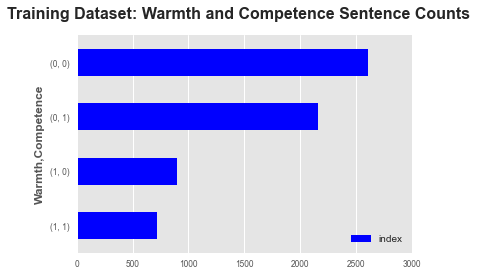

In [2]:
# Visualize data balance
df_jobs_labeled.info()
df_jobs_labeled['Warmth'].value_counts()
df_jobs_labeled['Competence'].value_counts()
warm_comp_count = (
    df_jobs_labeled[analysis_columns]
    .reset_index()
    .groupby(analysis_columns)
    .count()
    .sort_values(by='index')
)
fig, ax = plt.subplots()
fig.suptitle('Training Dataset: Warmth and Competence Sentence Counts', fontsize=16.0)
warm_comp_count.plot(kind='barh', stacked=True, legend=True, color='blue', ax=ax).grid(
    axis='y'
)
# fig.tight_layout()
if save_enabled == True:
    fig.savefig(f'{plot_save_path}Warmth and Competence Sentence Counts.{image_save_format}', format=image_save_format, dpi=3000)

fig.show()

In [3]:
for col in tqdm.tqdm(analysis_columns):
    if (
        len(
            df_jobs_labeled[
                df_jobs_labeled[str(col)].map(
                    df_jobs_labeled[str(col)].value_counts() > 50
                )
            ]
        )
        != 0
    ):
        print('-' * 20)
        print('\n')
        print(
            f'============================ PROCESSING {col} ============================'
        )
        print('\n')
        print('-' * 20)

        if str(col) == 'Warmth':
            vectorizer_name = final_warmth_vectorizer
            classifier_name = final_warmth_classifier
        elif str(col) == 'Competence':
            vectorizer_name = final_competence_vectorizer
            classifier_name = final_competence_classifier

        # Set vectorizer and params
        vectorizer = vectorizers[vectorizer_name][0]
        vectorizer_params = vectorizers[vectorizer_name][1]
        vectorizer.set_params(**vectorizer_params)

        # Set classifier and params
        classifier = classifiers[classifier_name][0]
        classifier_params = classifiers[classifier_name][1]
        classifier.set_params(**classifier_params)

        # BOW Split
        print('Splitting data into training and test sets.')
        df_jobs_labeled.dropna(subset=[col, text_col], how='any', inplace=True)

        train, test = train_test_split(
            df_jobs_labeled, test_size=test_split, train_size = 1-test_split, random_state=random_state
        )

        X_train = train[f'{str(text_col)}'].astype('str').values
        y_train = train[str(col)].astype('int64').values

        # BOW fit
        # Fit, transform, and get vocabulary
        print('Fitting and transforming data.')

        # BOW fit transform
        X_train = vectorizer.fit_transform(X_train)

        # Oversampling to fix imbalance
        if (resampling_enabled == True) and (col == 'Warmth'):
            X_train, y_train = resample_data(X_train, y_train, col, resampling_enabled, resampling_method)

        # Selecting best features
        if select_best_enabled == True:
            print('Selecting best features.')
            X_train = selector.fit_transform(X_train, y_train)

        # y to numpy array
        y_train = torch.from_numpy(np.array(y_train)).float()
        if print_enabled:
            print(f'Train targets: {y_train}')

        # Save vectorizer and selector
        if save_enabled == True:
            with open(
                f'{models_save_path}FINAL Vectorizer {str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}',
                'wb',
            ) as f:
                joblib.dump(vectorizer, f)
            if select_best_enabled == True:
                with open(
                    f'{models_save_path}FINAL Selector {str(col)} - {vectorizer_name} + {classifier_name}.{file_save_format}',
                    'wb',
                ) as f:
                    joblib.dump(selector, f)

  0%|          | 0/2 [00:00<?, ?it/s]

--------------------


============================ PROCESSING Warmth ============================


--------------------


TfidfVectorizer(lowercase='False', max_features=10000, ngram_range=(1, 3),
                use_idf='True')

LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=1,
                   random_state=42, solver='liblinear')

Splitting data into training and test sets.
Fitting and transforming data.
Resampling Warmth to fix imbalance.
--------------------
Original dataset shape (4791,)
Original dataset, counts of label "1": 1206
Original dataset, counts of label "0": 3585
Resampled dataset shape (4791,)
Resampled dataset, counts of label "1": 1206
Resampled dataset, counts of label "0": 3585
--------------------
Selecting best features.


 50%|█████     | 1/2 [00:04<00:04,  4.19s/it]

--------------------


============================ PROCESSING Competence ============================


--------------------


FeatureUnion(transformer_list=[('CountVectorizer',
                                CountVectorizer(lowercase='True',
                                                max_features=10000,
                                                ngram_range=(1, 3))),
                               ('TfidfVectorizer',
                                TfidfVectorizer(lowercase='False',
                                                max_features=10000,
                                                ngram_range=(1, 3),
                                                use_idf='True'))])

VotingClassifier(estimators=[('Multinomial Naive Bayes', MultinomialNB()),
                             ('Logistic Regression',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42))],
                 n_jobs=1, voting='soft')

Splitting data into training and test sets.
Fitting and transforming data.
Selecting best features.


100%|██████████| 2/2 [00:06<00:00,  3.34s/it]
